In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (Assuming you have a CSV file)
df = pd.read_csv('/content/twitter_training.csv', names=['ID', 'Topic', 'Sentiment', 'Text'])
df.head()

In [ ]:
# Drop duplicates and missing values
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)
df.dropna(inplace=True)
print(df.shape)
df.head()

(71656, 4)
(71656, 4)
(71656, 4)


,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


<ipython-input-5-d3ea5e6e3db4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='viridis')


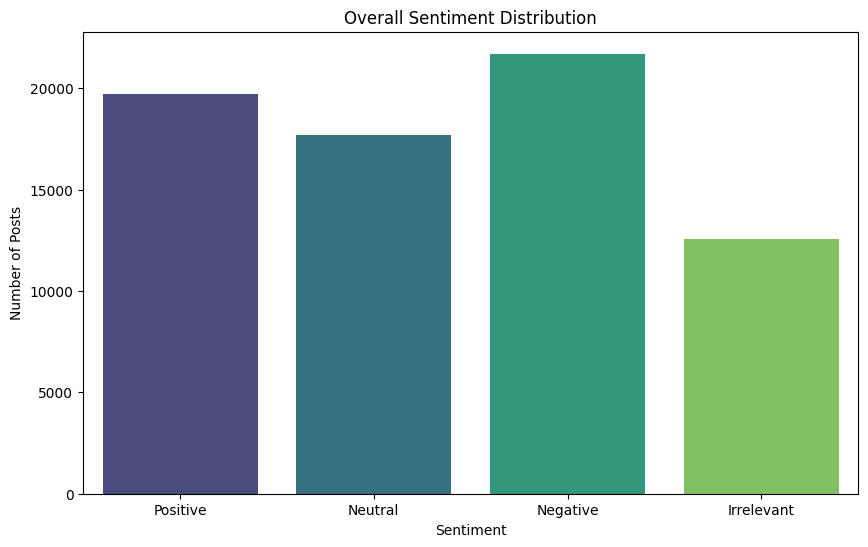

In [ ]:
# Visualize the overall sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=df, palette='viridis')
plt.title('Overall Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Posts')
plt.show()

In [ ]:
# Interpret the overall sentiment
sentiment_counts = df['Sentiment'].value_counts()
print("Overall Sentiment Distribution:")
print(sentiment_counts)
print("\nThis shows how many posts are Positive, Negative, or Neutral. For example, if 'Positive' is the highest, it indicates a generally positive public opinion.")

Overall Sentiment Distribution:
Sentiment
Negative      21698
Positive      19713
Neutral       17708
Irrelevant    12537
Name: count, dtype: int64

This shows how many posts are Positive, Negative, or Neutral. For example, if 'Positive' is the highest, it indicates a generally positive public opinion.


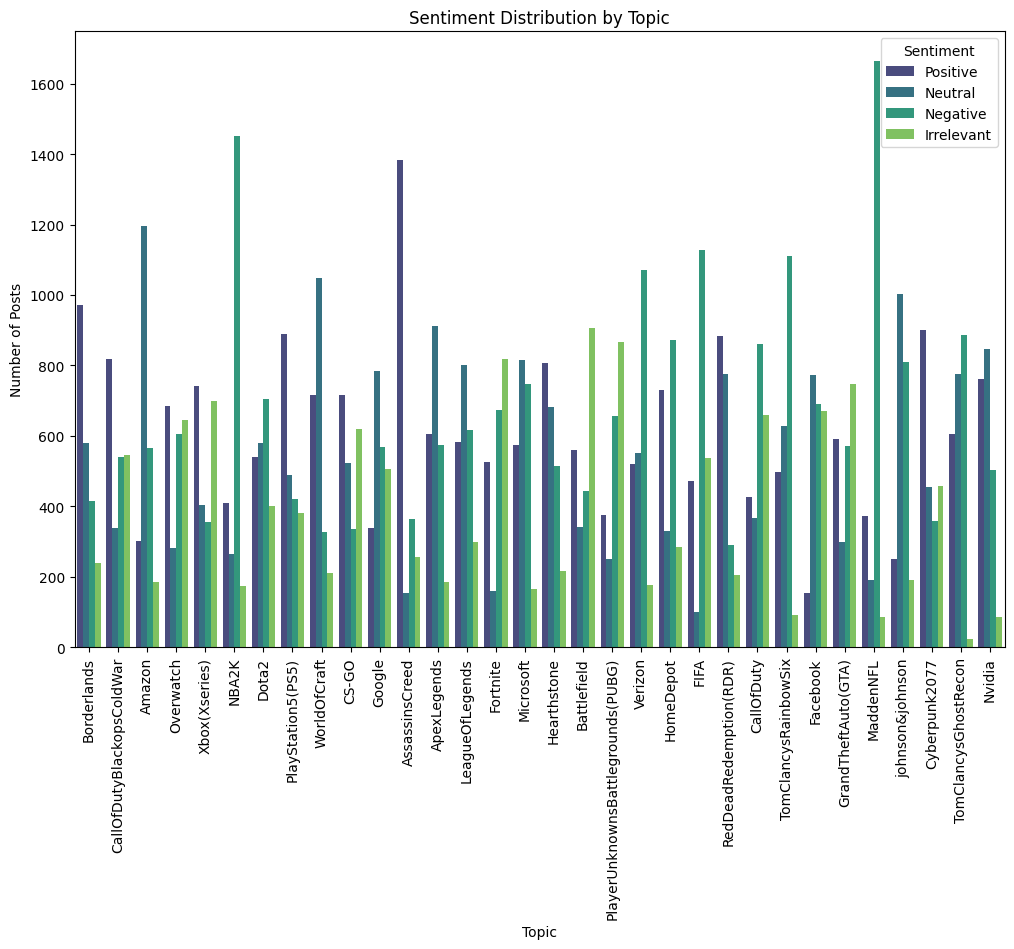

In [ ]:
# Visualize sentiment distribution by topic
plt.figure(figsize=(12, 8))
sns.countplot(x='Topic', hue='Sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution by Topic')
plt.xlabel('Topic')
plt.ylabel('Number of Posts')
plt.xticks(rotation=90)
plt.show()

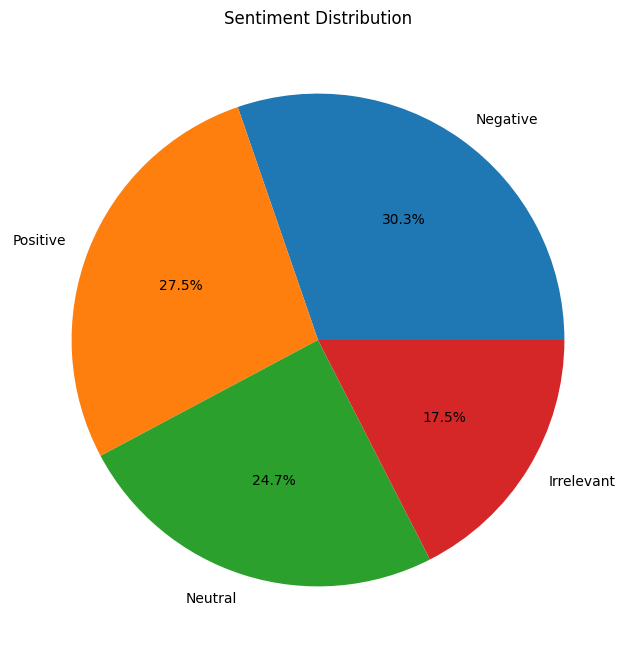

In [ ]:
df['Sentiment'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(8, 8))
plt.title('Sentiment Distribution')
plt.ylabel('')
plt.show()

In [ ]:
# Load your dataset (Assuming you have a CSV file)
df2 = pd.read_csv('/content/twitter_validation.csv', names=['ID', 'Topic', 'Sentiment', 'Text'])
df2.head()

,ID,Topic,Sentiment,Text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [ ]:
# Drop duplicates and missing values
df2.drop_duplicates(inplace=True)
df2.dropna(inplace=True)
df2.head()

,ID,Topic,Sentiment,Text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


<ipython-input-10-5e016cd2c56a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df2, palette='viridis')


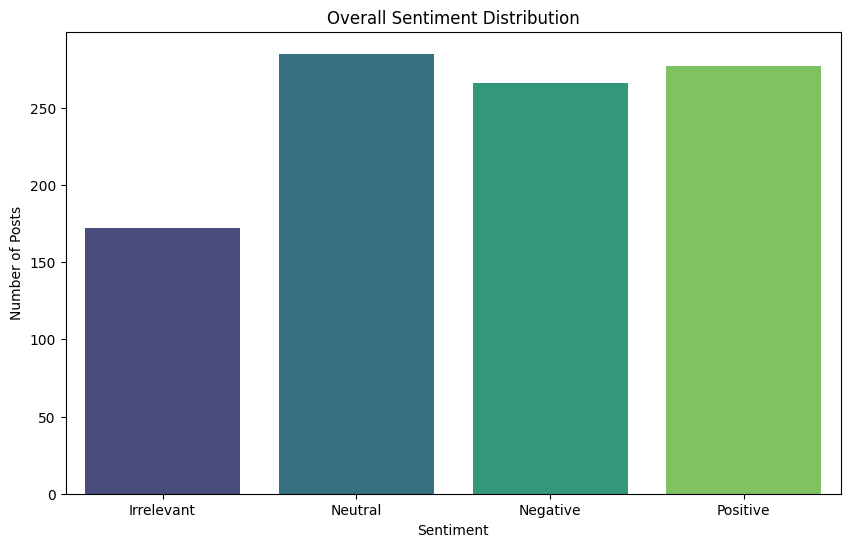

In [ ]:
# Visualize the overall sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=df2, palette='viridis')
plt.title('Overall Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Posts')
plt.show()

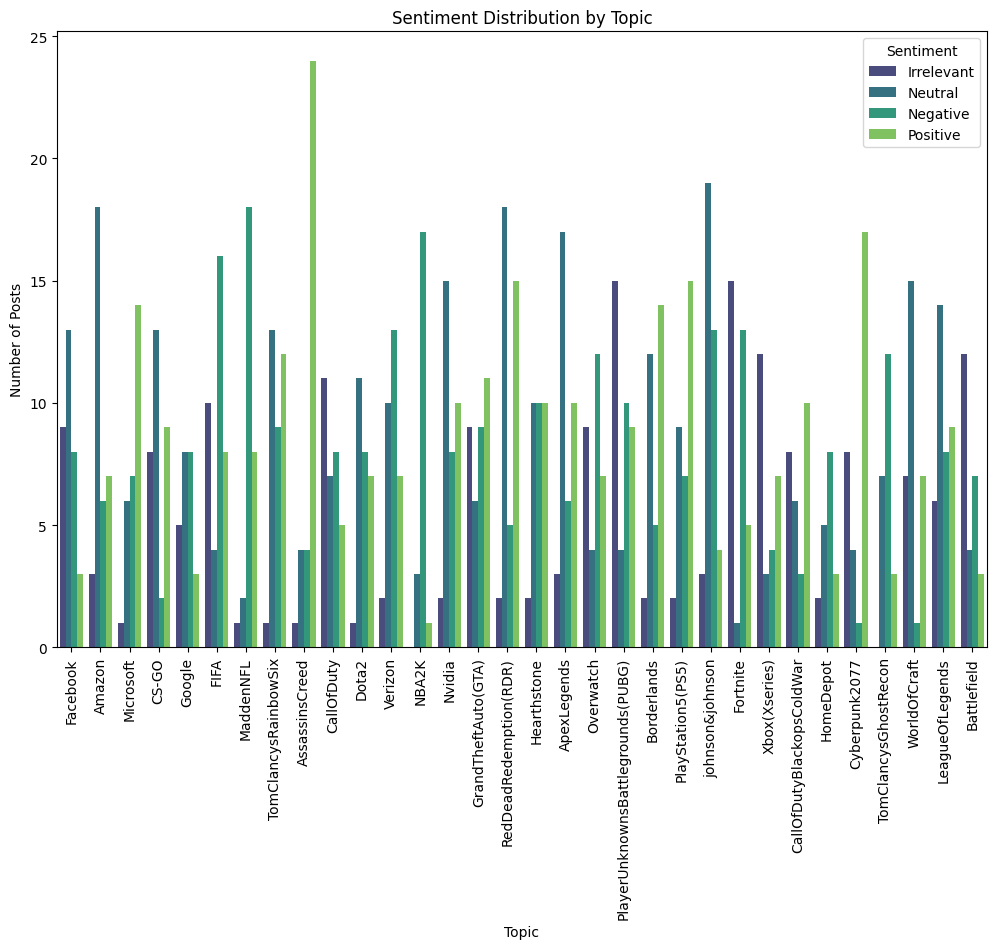

In [ ]:
# Visualize sentiment distribution by topic
plt.figure(figsize=(12, 8))
sns.countplot(x='Topic', hue='Sentiment', data=df2, palette='viridis')
plt.title('Sentiment Distribution by Topic')
plt.xlabel('Topic')
plt.ylabel('Number of Posts')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Interpret sentiment by topic
sentiment_by_topic = df2.groupby('Topic')['Sentiment'].value_counts(normalize=True).unstack().fillna(0)
print("Sentiment Distribution by Topic (Proportion):")
print(sentiment_by_topic)
print("\nThis shows the proportion of each sentiment (Positive, Negative, Neutral) for each topic. You can identify which topics have more positive or negative sentiments.")


Sentiment Distribution by Topic (Proportion):
Sentiment                          Irrelevant  Negative   Neutral  Positive
Topic                                                                      
Amazon                               0.088235  0.176471  0.529412  0.205882
ApexLegends                          0.083333  0.166667  0.472222  0.277778
AssassinsCreed                       0.030303  0.121212  0.121212  0.727273
Battlefield                          0.461538  0.269231  0.153846  0.115385
Borderlands                          0.060606  0.151515  0.363636  0.424242
CS-GO                                0.250000  0.062500  0.406250  0.281250
CallOfDuty                           0.354839  0.258065  0.225806  0.161290
CallOfDutyBlackopsColdWar            0.296296  0.111111  0.222222  0.370370
Cyberpunk2077                        0.266667  0.033333  0.133333  0.566667
Dota2                                0.037037  0.296296  0.407407  0.259259
FIFA                                 0.263

In [ ]:
# Example Insight Extraction:
for topic in sentiment_by_topic.index:
    print(f"\nTopic: {topic}")
    print(f"Most common sentiment: {sentiment_by_topic.loc[topic].idxmax()} with a proportion of {sentiment_by_topic.loc[topic].max():.2f}")
    if sentiment_by_topic.loc[topic].idxmax() == 'Negative':
        print("Consider investigating why this topic has a negative sentiment.")



Topic: Amazon
Most common sentiment: Neutral with a proportion of 0.53

Topic: ApexLegends
Most common sentiment: Neutral with a proportion of 0.47

Topic: AssassinsCreed
Most common sentiment: Positive with a proportion of 0.73

Topic: Battlefield
Most common sentiment: Irrelevant with a proportion of 0.46

Topic: Borderlands
Most common sentiment: Positive with a proportion of 0.42

Topic: CS-GO
Most common sentiment: Neutral with a proportion of 0.41

Topic: CallOfDuty
Most common sentiment: Irrelevant with a proportion of 0.35

Topic: CallOfDutyBlackopsColdWar
Most common sentiment: Positive with a proportion of 0.37

Topic: Cyberpunk2077
Most common sentiment: Positive with a proportion of 0.57

Topic: Dota2
Most common sentiment: Neutral with a proportion of 0.41

Topic: FIFA
Most common sentiment: Negative with a proportion of 0.42
Consider investigating why this topic has a negative sentiment.

Topic: Facebook
Most common sentiment: Neutral with a proportion of 0.39

Topic: Fo